In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('titanic_data.csv')
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
data.shape

(889, 15)

In [4]:
missingData = data.isnull().sum()
missingData

,0
survived,0
pclass,0
sex,0
age,176
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


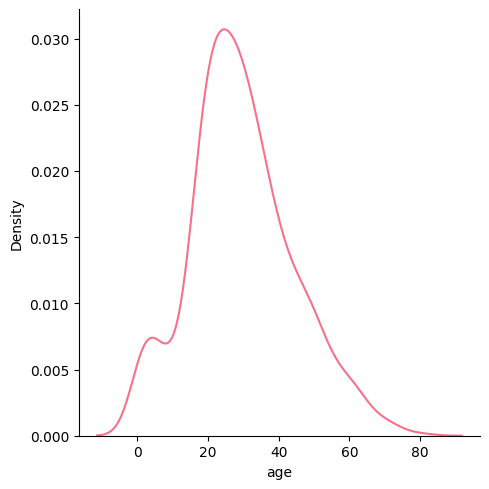

In [5]:
# show the Distribution for age column
sns.set_palette("husl")
sns.displot(data=data, x="age", kind="kde")

In [6]:
# fill all null values to the median
data['age'].fillna(data['age'].median(), inplace=True)

<ipython-input-6-f595c04bb043>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


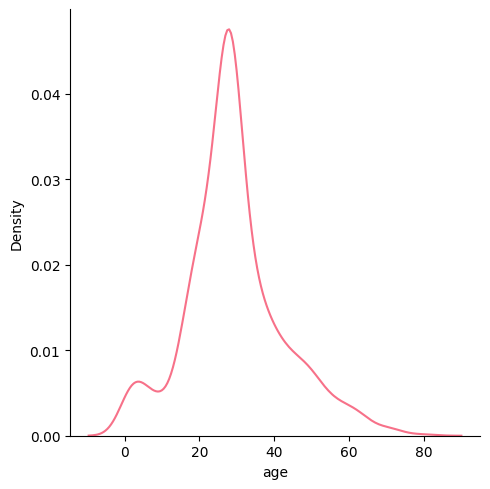

In [7]:
sns.set_palette("husl")
sns.displot(data=data, x="age", kind="kde")

<Axes: xlabel='embarked', ylabel='count'>

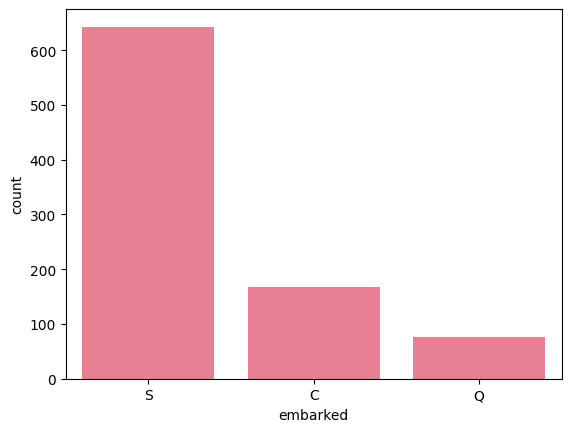

In [8]:
sns.countplot(data=data, x="embarked")

In [9]:
# fill all null values for either 'S' or 'C' or 'Q'
fillList = ['S', 'C', 'Q']
data['embarked'].fillna(pd.Series(np.random.choice(
    fillList, size=len(data.index))), inplace=True)

<ipython-input-9-664fad41e70a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['embarked'].fillna(pd.Series(np.random.choice(


<Axes: xlabel='embarked', ylabel='count'>

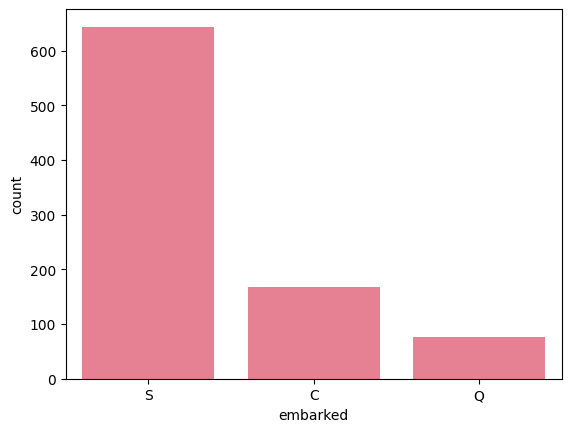

In [10]:
sns.countplot(data=data, x="embarked")

<Axes: xlabel='deck', ylabel='count'>

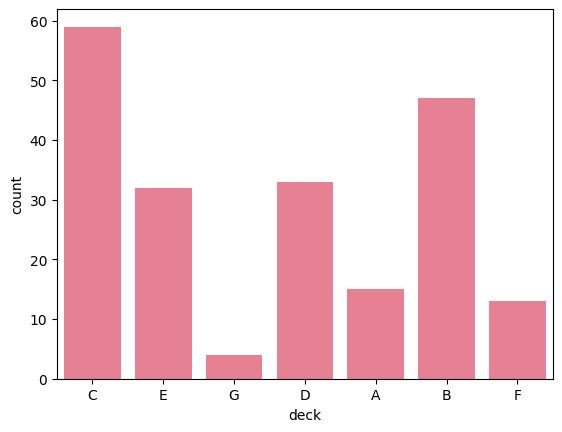

In [11]:
sns.countplot(data=data, x="deck")

In [12]:
fillList = ['C', 'E', 'G', 'D', 'A', 'B', 'F']
data['deck'].fillna(pd.Series(np.random.choice(
    fillList, size=len(data.index))), inplace=True)

<ipython-input-12-abe190bf1da0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['deck'].fillna(pd.Series(np.random.choice(


<Axes: xlabel='deck', ylabel='count'>

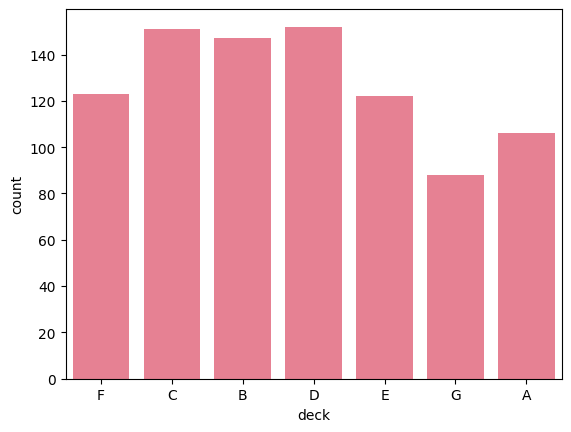

In [13]:
sns.countplot(data=data, x="deck")

<Axes: xlabel='embark_town', ylabel='count'>

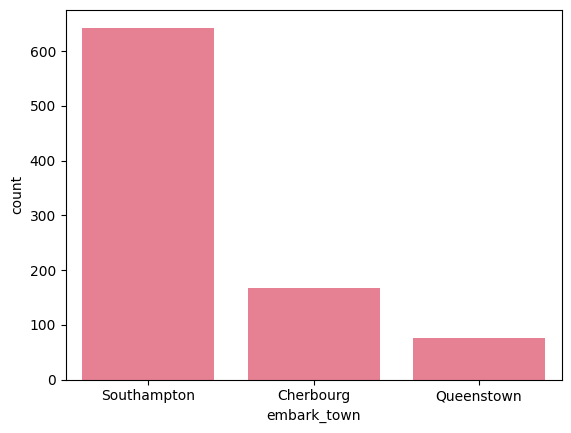

In [14]:
sns.countplot(data=data, x="embark_town")

In [15]:
fillList = ['Southampton', 'Cherbourg', 'Queenstown']
data['embark_town'].fillna(pd.Series(np.random.choice(
    fillList, size=len(data.index))), inplace=True)

<ipython-input-15-6238cd624afc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['embark_town'].fillna(pd.Series(np.random.choice(


<Axes: xlabel='embark_town', ylabel='count'>

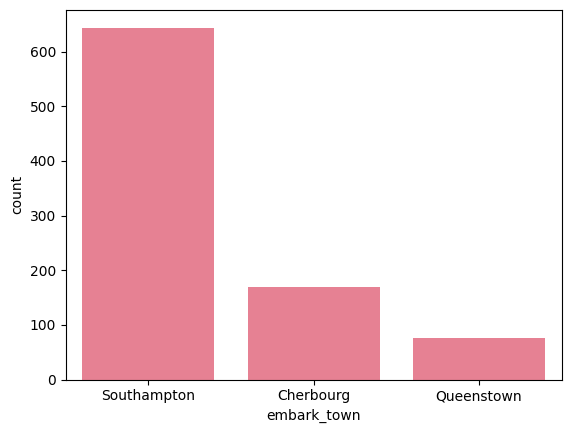

In [16]:
sns.countplot(data=data, x="embark_town")

In [17]:
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [18]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

In [19]:
# lable encode for categorical data
le = LabelEncoder()
data['who'] = le.fit_transform(data['who'])
data['sex'] = le.fit_transform(data['sex'])
data['adult_male'] = le.fit_transform(data['adult_male'])
data['alone'] = le.fit_transform(data['alone'])
data['alive'] = le.fit_transform(data['alive'])
data['embark_town'] = le.fit_transform(data['embark_town'])
data['deck'] = le.fit_transform(data['deck'])
data['class'] = le.fit_transform(data['class'])
data['embarked'] = le.fit_transform(data['embarked'])
print(data)

     survived  pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0           0       3    1  22.0      1      0   7.2500         2      2    1   
1           1       1    0  38.0      1      0  71.2833         0      0    2   
2           1       3    0  26.0      0      0   7.9250         2      2    2   
3           1       1    0  35.0      1      0  53.1000         2      0    2   
4           0       3    1  35.0      0      0   8.0500         2      2    1   
..        ...     ...  ...   ...    ...    ...      ...       ...    ...  ...   
884         0       2    1  27.0      0      0  13.0000         2      1    1   
885         1       1    0  19.0      0      0  30.0000         2      0    2   
886         0       3    0  28.0      1      2  23.4500         2      2    2   
887         1       1    1  26.0      0      0  30.0000         0      0    1   
888         0       3    1  32.0      0      0   7.7500         1      2    1   

     adult_male  deck  emba

In [20]:
# drop_duplicates
data = data.drop(columns=['survived','sex'])
print(data)

     pclass   age  sibsp  parch     fare  embarked  class  who  adult_male  \
0         3  22.0      1      0   7.2500         2      2    1           1   
1         1  38.0      1      0  71.2833         0      0    2           0   
2         3  26.0      0      0   7.9250         2      2    2           0   
3         1  35.0      1      0  53.1000         2      0    2           0   
4         3  35.0      0      0   8.0500         2      2    1           1   
..      ...   ...    ...    ...      ...       ...    ...  ...         ...   
884       2  27.0      0      0  13.0000         2      1    1           1   
885       1  19.0      0      0  30.0000         2      0    2           0   
886       3  28.0      1      2  23.4500         2      2    2           0   
887       1  26.0      0      0  30.0000         0      0    1           1   
888       3  32.0      0      0   7.7500         1      2    1           1   

     deck  embark_town  alive  alone  
0       5            2  

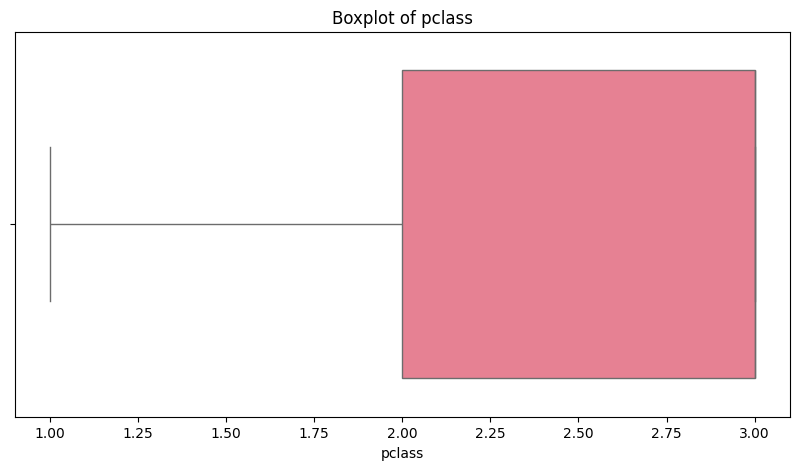

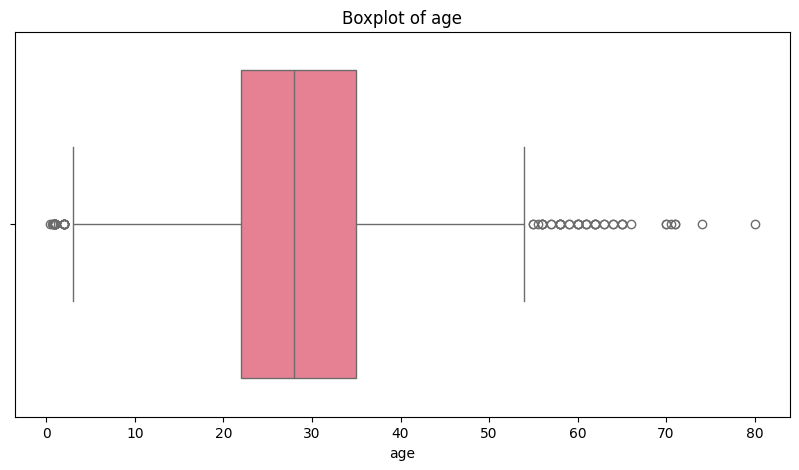

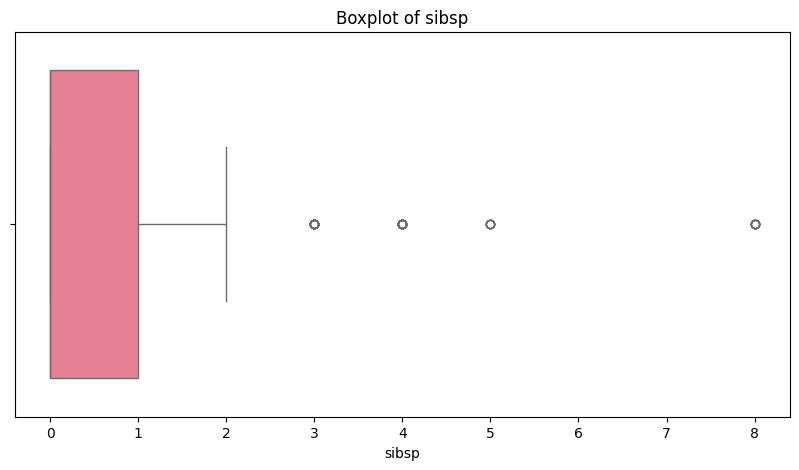

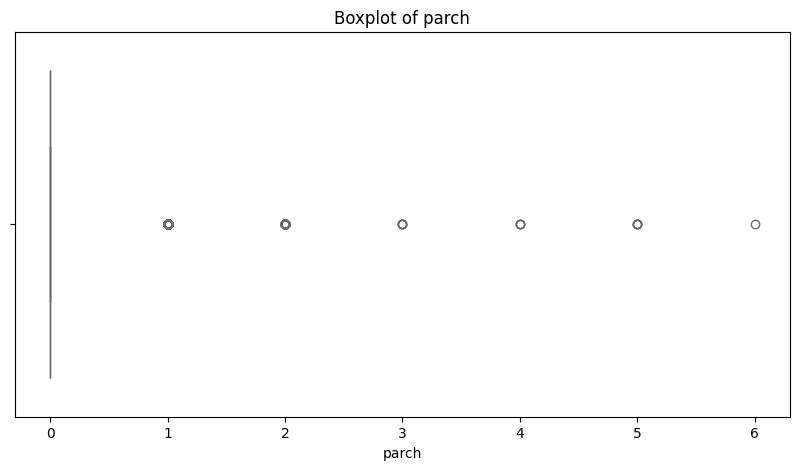

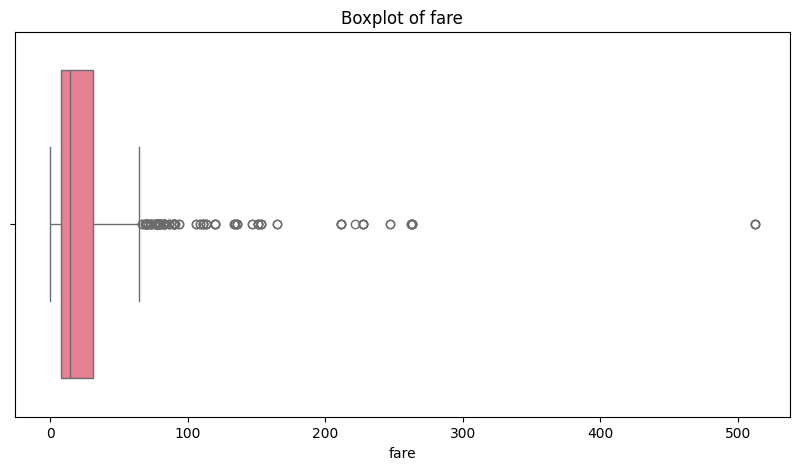

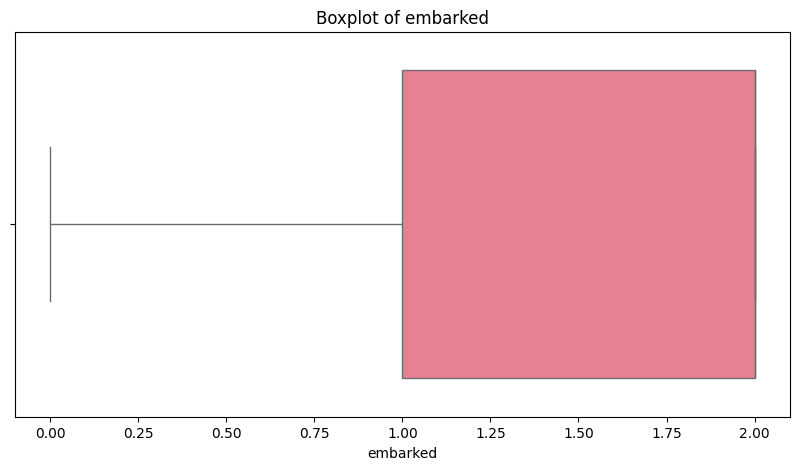

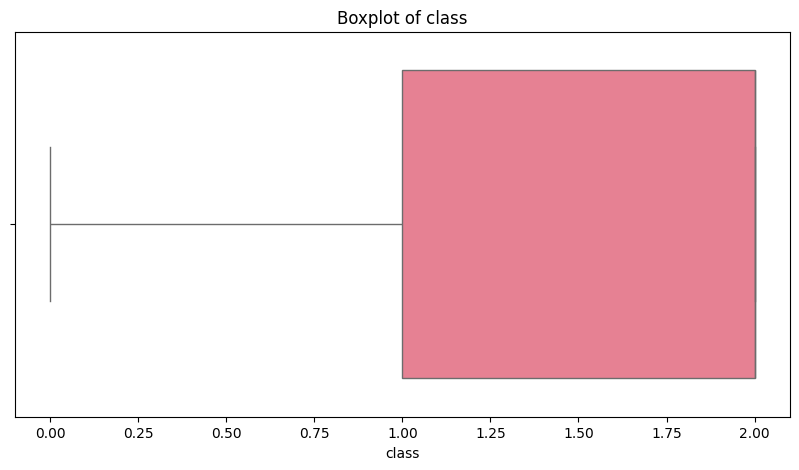

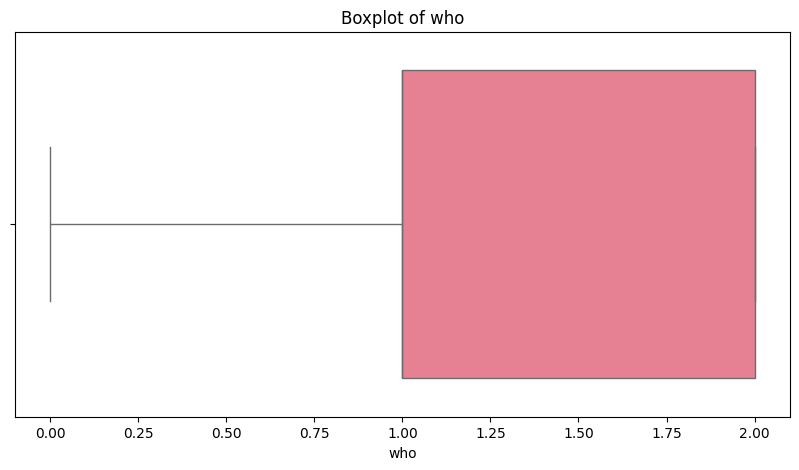

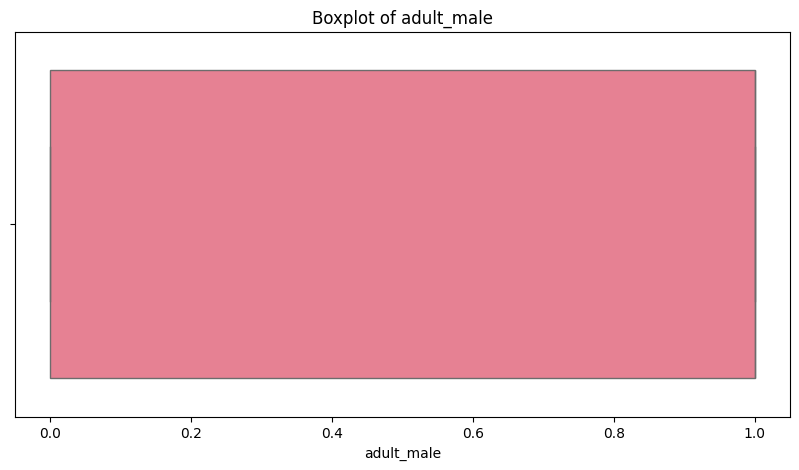

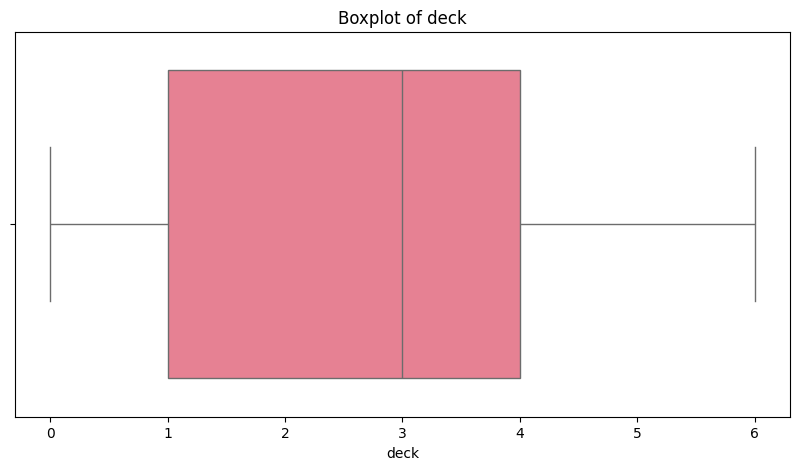

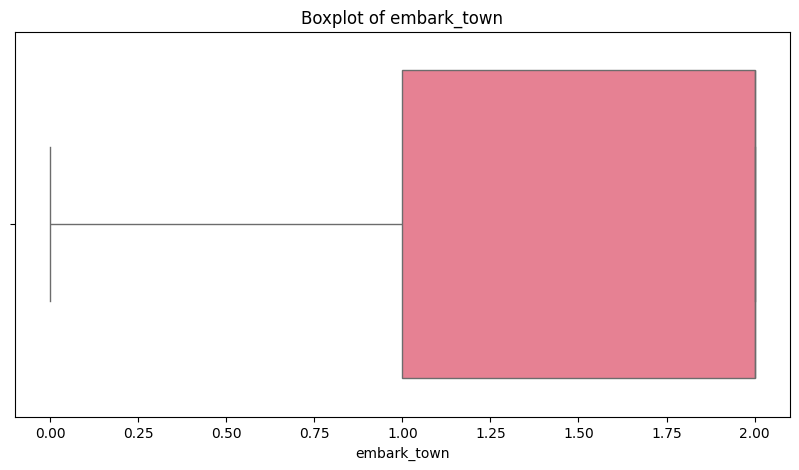

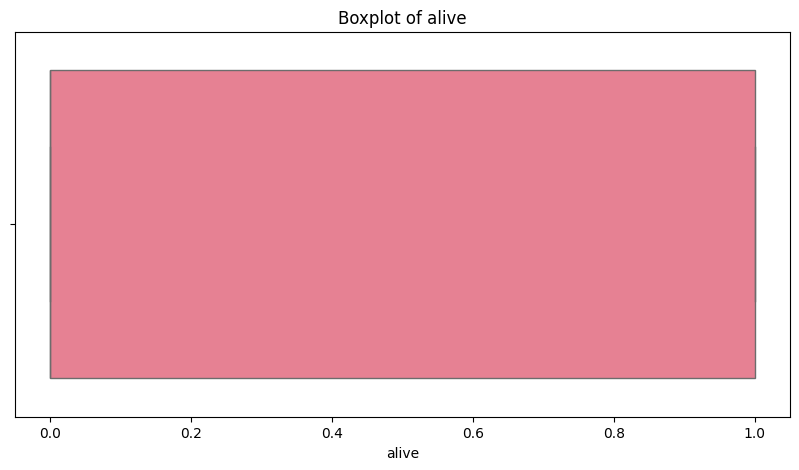

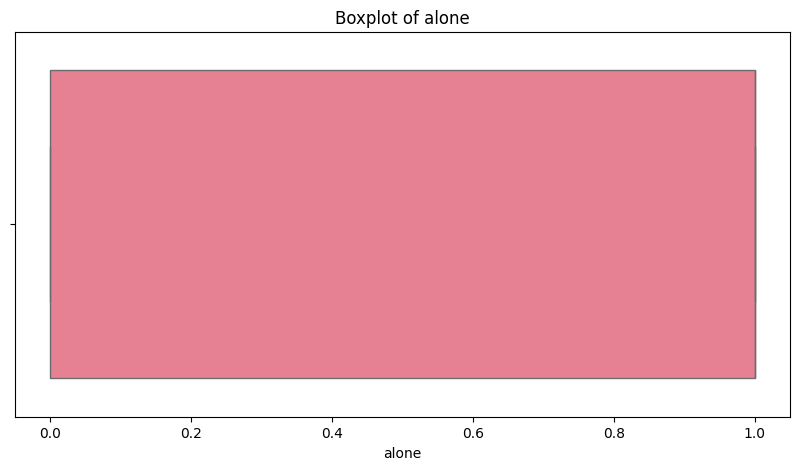

In [21]:
# show boxplot for every column

for col in data.columns:
    if data[col].dtype != 'object':
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.set_title(f'Boxplot of {col}')
        bp = sns.boxplot(data=data, x=col)
        plt.show()

In [22]:
data.drop(data[data['age'] > 60].index, axis=0, inplace=True)
data.drop(data[data['age'] < 5].index, axis=0, inplace=True)

In [23]:
data.drop(data[data['fare'] > 100].index, axis=False, inplace=True)

In [24]:
# split the data to input and output(lable)
x = data.iloc[:,:11]
x['alone'] = data['alone']
y = data.iloc[:, 11]
print(x)
print(y)

     pclass   age  sibsp  parch     fare  embarked  class  who  adult_male  \
0         3  22.0      1      0   7.2500         2      2    1           1   
1         1  38.0      1      0  71.2833         0      0    2           0   
2         3  26.0      0      0   7.9250         2      2    2           0   
3         1  35.0      1      0  53.1000         2      0    2           0   
4         3  35.0      0      0   8.0500         2      2    1           1   
..      ...   ...    ...    ...      ...       ...    ...  ...         ...   
884       2  27.0      0      0  13.0000         2      1    1           1   
885       1  19.0      0      0  30.0000         2      0    2           0   
886       3  28.0      1      2  23.4500         2      2    2           0   
887       1  26.0      0      0  30.0000         0      0    1           1   
888       3  32.0      0      0   7.7500         1      2    1           1   

     deck  embark_town  alone  
0       5            2      0  

In [25]:
# split x data to trian and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [26]:
# StandardScaler for x data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
# logisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [28]:
Y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, Y_pred)
print(cm)
accuracy_score(y_test, Y_pred)

[[90  8]
 [19 39]]


0.8269230769230769

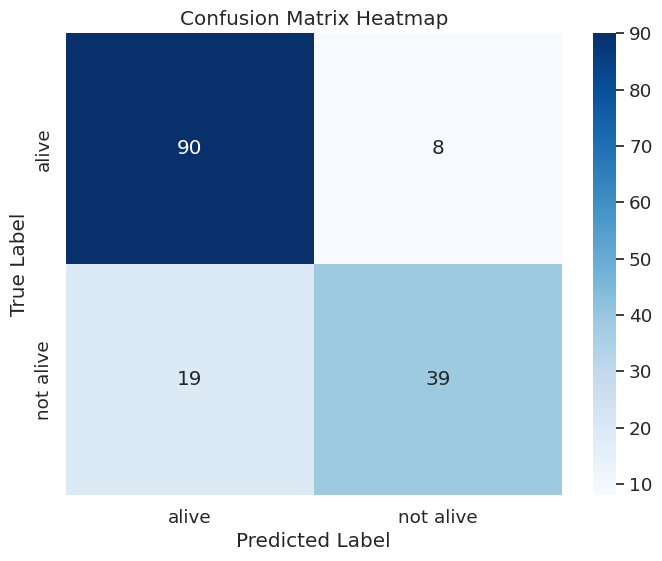

In [29]:
class_labels = ['alive', 'not alive']

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [30]:
# SVM
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [31]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[91  7]
 [23 35]]


0.8076923076923077

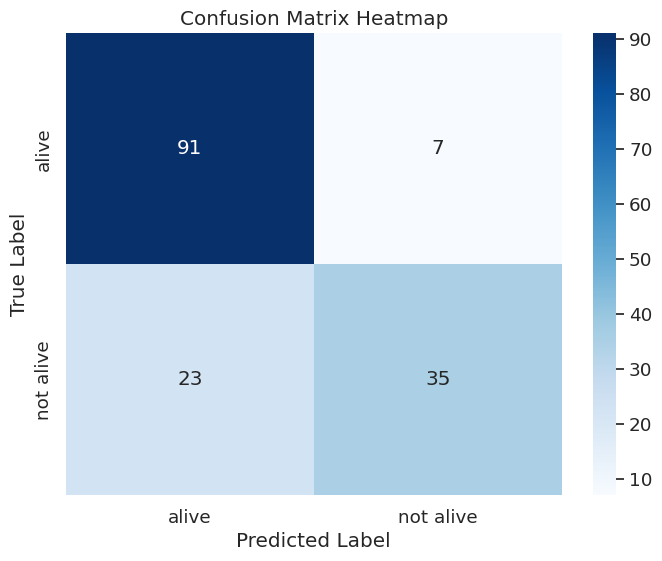

In [32]:
class_labels = ['alive', 'not alive']

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [33]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0,max_depth=7)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

In [34]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[88 10]
 [19 39]]


0.8141025641025641

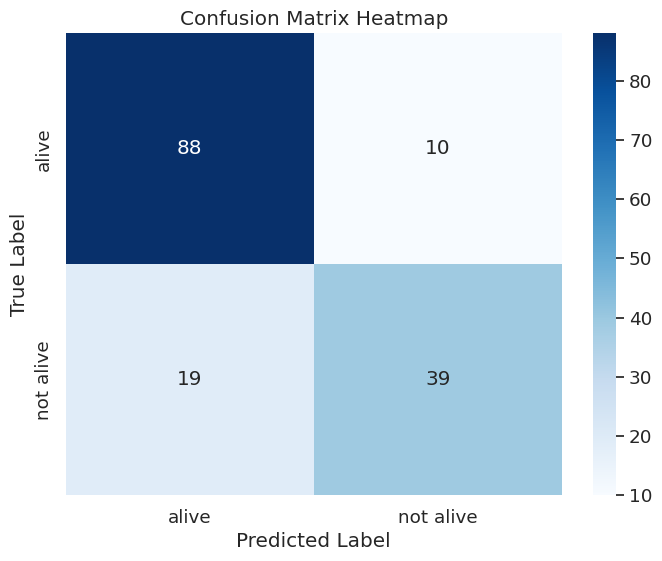

In [35]:
class_labels = ['alive', 'not alive']

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()